In [1]:
#Get all packages needed
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
import seaborn as sns
from datetime import datetime
warnings.filterwarnings("ignore")

In [142]:
xls = pd.ExcelFile('Raw.xlsx')
df = pd.read_excel(xls, 'CustomerDemographic')
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [145]:
df.shape

(4000, 13)

In [146]:
work = df
work.shape

(4000, 13)

In [5]:
work.gender.value_counts()

Female    2037
Male      1872
U           88
F            1
M            1
Femal        1
Name: gender, dtype: int64

In [147]:
work.gender = work.gender.replace(['Femal', 'F'], 'Female')
work.gender = work.gender.replace(['M'], 'Male')
work.gender = work.gender.replace(['U'], 'Unknown')

work.gender.value_counts()

Female     2039
Male       1873
Unknown      88
Name: gender, dtype: int64

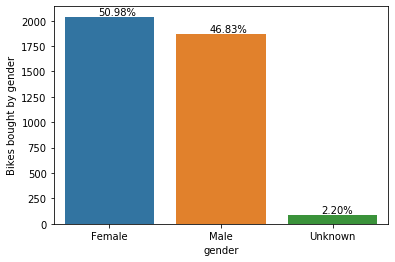

In [148]:
df.gender = df.gender.replace(['Femal', 'F'], 'Female')
df.gender = df.gender.replace(['M'], 'Male')
df.gender = df.gender.replace(['U'], 'Unknown')

df.gender.value_counts()

ax = sns.countplot(work.gender )
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()/(df.gender.count())*100), (p.get_x()+0.3, p.get_height()+12))
ax.set_ylabel('Bikes bought by gender')
ax.figure.savefig("kpmg_gender.png")


In [8]:
work['DOB'] = work['DOB'].map(lambda x: str(x)[:-15])
work.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [9]:
work = work[work.DOB.apply(lambda x: x.isnumeric())]

work.DOB = work.DOB.astype(int)
work.DOB = 2020 - work.DOB 

In [11]:
work.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,67,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,40,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,66,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,59,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,43,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


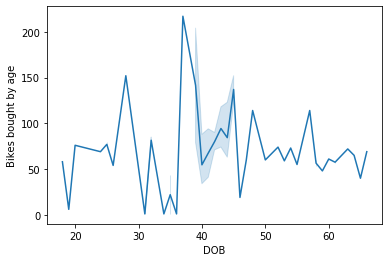

In [128]:
ax = sns.lineplot(x="DOB", y=work.DOB.value_counts(),
                  data=work)
ax.set_ylabel('Bikes bought by age')
ax.figure.savefig("kpmg_DOB.png")


In [15]:
work.drop(work[work['gender'] == 'Unknown'].index, inplace = True) 


In [16]:
work.shape

(3912, 13)

Text(0, 0.5, 'Bikes bought by age for different gender')

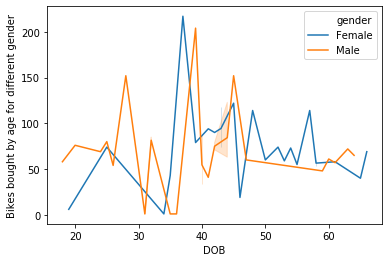

In [18]:
ax = sns.lineplot(x= 'DOB' , y=work.DOB.value_counts(),hue = 'gender',
                  data=work)
ax.set_ylabel('Bikes bought by age for different gender')


In [19]:
work.DOB.describe()

count    3912.000000
mean       42.935072
std        12.617249
min        18.000000
25%        33.000000
50%        43.000000
75%        52.000000
max        89.000000
Name: DOB, dtype: float64

In [71]:
labels = ['0-20 Yr','20-40 Yr','40-60 Yr','60-80 Yr','80-100 Yr']
work['AgeGroup'] = pd.cut(work['DOB'], bins=[0,20,40,60,80,100], labels= labels)


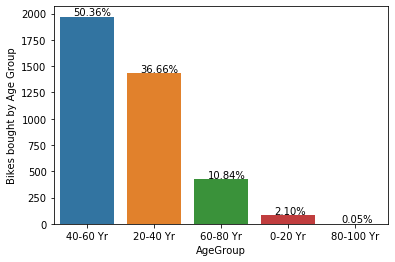

In [129]:
ax = sns.countplot(work.AgeGroup, order = work['AgeGroup'].value_counts().index )
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()/(work.AgeGroup.count())*100), (p.get_x()+0.2, p.get_height()+12))
ax.set_ylabel('Bikes bought by Age Group')
ax.figure.savefig("kpmg_Age Group.png")


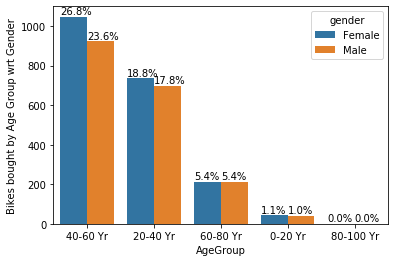

In [130]:
ax = sns.countplot(work.AgeGroup , hue = work.gender, order = work['AgeGroup'].value_counts().index  )
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/(work.AgeGroup.count())*100), (p.get_x(), p.get_height()+12))
ax.set_ylabel('Bikes bought by Age Group wrt Gender')
ax.figure.savefig("kpmg_Age Group wrt Gender.png")


In [40]:
work["job_industry_category"].value_counts()


Manufacturing         796
Financial Services    767
Health                596
Retail                358
Property              267
IT                    151
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

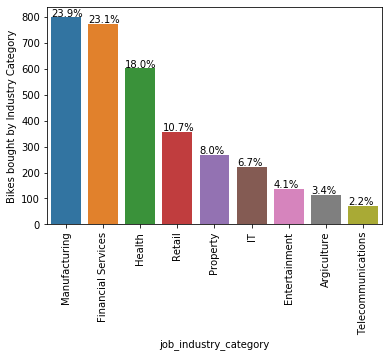

In [155]:
ax = sns.countplot(work.job_industry_category, order = work['job_industry_category'].value_counts().index )
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/(work.job_industry_category.count())*100), (p.get_x(), p.get_height()+4))
ax.set_ylabel('Bikes bought by Industry Category')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.figure.savefig("kpmg_Industry Category.png", bbox_inches = 'tight')


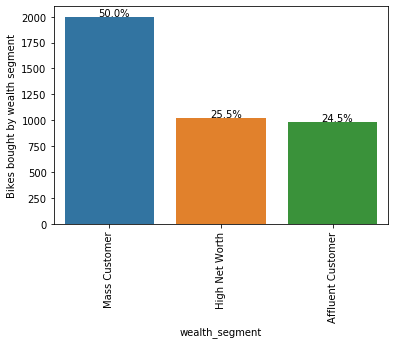

In [156]:
ax = sns.countplot(work.wealth_segment, order = work['wealth_segment'].value_counts().index )
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/(work.wealth_segment.count())*100), (p.get_x()+0.3, p.get_height()+10))
ax.set_ylabel('Bikes bought by wealth segment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.figure.savefig("kpmg_wealth segment.png", bbox_inches = 'tight')

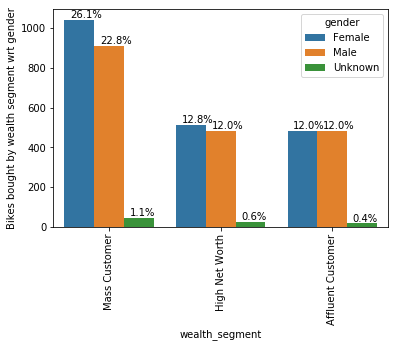

In [157]:
ax = sns.countplot(work.wealth_segment, hue = work.gender, order = work['wealth_segment'].value_counts().index )
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/(work.wealth_segment.count())*100), (p.get_x()+0.05, p.get_height()+10))
ax.set_ylabel('Bikes bought by wealth segment wrt gender')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.figure.savefig("kpmg_wealth segment gender.png", bbox_inches = 'tight')

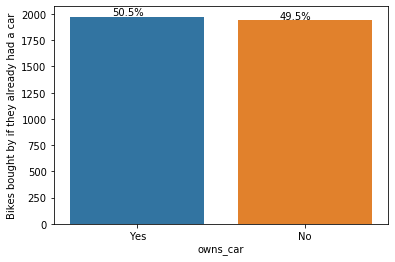

In [134]:
ax = sns.countplot(work.owns_car, order = work['owns_car'].value_counts().index )
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/(work.owns_car.count())*100), (p.get_x()+0.25, p.get_height()+13))
ax.set_ylabel('Bikes bought by if they already had a car')
ax.set_xticklabels(ax.get_xticklabels())
ax.figure.savefig("kpmg_car.png")

In [102]:
work.tenure.describe()

count    3912.000000
mean       10.654652
std         5.658898
min         1.000000
25%         6.000000
50%        11.000000
75%        15.000000
max        22.000000
Name: tenure, dtype: float64

In [103]:
labels1 = ['0-5 Yr','5-10 Yr','10-15 Yr','15-20 Yr','20-25 Yr']
work['TenureGroup'] = pd.cut(work['tenure'], bins=[0,5,10,15,20,25], labels= labels1)


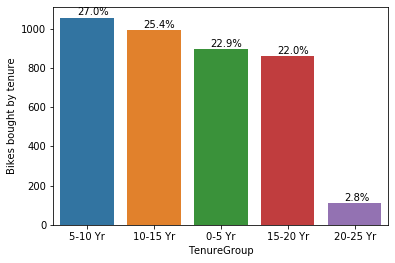

In [135]:
ax = sns.countplot(work.TenureGroup, order = work['TenureGroup'].value_counts().index )
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/(work.TenureGroup.count())*100), (p.get_x()+0.25, p.get_height()+13))
ax.set_ylabel('Bikes bought by tenure')
ax.set_xticklabels(ax.get_xticklabels())
ax.figure.savefig("kpmg_tenure.png")

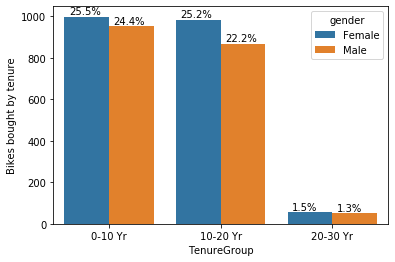

In [137]:
labels1 = ['0-10 Yr','10-20 Yr','20-30 Yr']
work['TenureGroup'] = pd.cut(work['tenure'], bins=[0,10,20,30], labels= labels1)


ax = sns.countplot(work.TenureGroup, hue = work.gender, order = work['TenureGroup'].value_counts().index )
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/(work.TenureGroup.count())*100), (p.get_x()+0.04, p.get_height()+11))
ax.set_ylabel('Bikes bought by tenure')
ax.set_xticklabels(ax.get_xticklabels())
ax.figure.savefig("kpmg_tenure wrt gender.png")

In [117]:
work.past_3_years_bike_related_purchases.describe()

count    3912.000000
mean       49.039366
std        28.768226
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

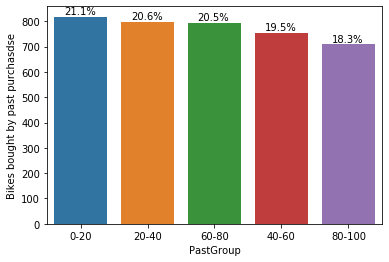

In [138]:
labels1 = ['0-20','20-40','40-60','60-80', '80-100']
work['PastGroup'] = pd.cut(work['past_3_years_bike_related_purchases'], bins=[0,20,40,60, 80, 100], labels= labels1)


ax = sns.countplot(work.PastGroup, order = work['PastGroup'].value_counts().index )
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/(work.PastGroup.count())*100), (p.get_x()+0.15, p.get_height()+9))
ax.set_ylabel('Bikes bought by past purchasdse')
ax.set_xticklabels(ax.get_xticklabels())
ax.figure.savefig("kpmg_past.png")